In [1]:
! pip install datasist

# For deployment of the model
! pip install streamlit
! pip install pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 116.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.16.0
    Uninstalling jupyter-server-1.16.0:
      Successfully uninstalled jupyter-server-1.16.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0

In [2]:
# for data set exploration
import datasist as ds
import numpy as np
import pandas as pd

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Setting visualization styles
%matplotlib inline
sns.set()

# for text processing
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

# for model building training and testing
import time
import warnings
from imblearn.over_sampling import ADASYN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import auc, classification_report, confusion_matrix, roc_curve, accuracy_score, roc_auc_score, auc, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

warnings.filterwarnings("ignore")

# for model deployement
from pyngrok import ngrok

In [3]:
# Downloading necessary word dictionaries
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('brown')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:
jobs_data = pd.read_csv("Training Dataset.csv")
jobs_data.shape

(14304, 18)

In [5]:
dataset = jobs_data
dataset

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,7531,Contact Center Representatives,"US, VA, Virginia Beach",NaN,NaN,Tidewater Finance Co. was established in 1992 ...,"Tidewater Finance Company, located in Virginia...",The position requires the following qualificat...,Our company offers a competitive salary plus B...,0,1,0,Full-time,Entry level,Unspecified,Financial Services,Customer Service,0
1,130,Customer Service Associate,"US, TX, Dallas",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,QualificationsMinimum of 1 year customer servi...,NaN,0,1,0,Full-time,Entry level,High School or equivalent,Telecommunications,Customer Service,0
2,4641,Automated Test Analyst,"NZ, , Auckland",Permanent,NaN,SilverStripe CMS &amp; Framework is an open so...,We are looking for a dedicated and passionate ...,NaN,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Information Technology and Services,NaN,0
3,403,Inside Sales Professional-Omaha,"US, NE, Omaha",NaN,NaN,"ABC Supply Co., Inc. is the nation’s largest w...","As a Sales Representative, you will provide as...","As a Sales Representative, you must have the a...",Your benefits package as a Sales Representativ...,0,1,0,Full-time,NaN,NaN,Building Materials,Sales,0
4,13219,Content Marketing/SEO Manager,"US, CA, Los Angeles",Marketing,NaN,MeUndies is a lifestyle brand that is transfor...,MeUndies is a lifestyle brand that is transfor...,REQUIREMENTS/QUALIFICATIONS/PERSONAL ATTRIBUTE...,"WHY MEUNDIES?We're a fast-growing, VC-backed c...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Marketing,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14299,1842,Public Relations Manager,"US, CA, Irvine",PR,60000-80000,HappyFox is a young startup that is all about ...,HappyFox is a young web SaaS startup that is a...,5+ years of experience relevant PR Proven trac...,Competitive payCasual and creative work enviro...,0,1,1,Contract,Associate,Bachelor's Degree,Information Technology and Services,Public Relations,0
14300,11853,iOS Developer,"GR, I, Athens",NaN,NaN,tizU is a free iphone app that allows you to s...,"tizU, the mobile app that allows you to send h...",2+ years of iOS developmentHave published at l...,We are not funded and we can't offer a salary ...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
14301,10871,Database Researcher,"US, NJ, Elmwood Park",NaN,20000-20000,"With over 1,300 investment professionals locat...",A Top Real Estate Investment Broker is seeking...,Required Skills:1. Excel / Microsoft Office2. ...,NaN,0,1,0,Full-time,Entry level,High School or equivalent,Real Estate,NaN,0
14302,566,Customer Service Associate,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Full-time,Entry level,High School or equivalent,Legal Services,Administrative,0


fraudulent
0    13611
1      693
Name: count, dtype: int64


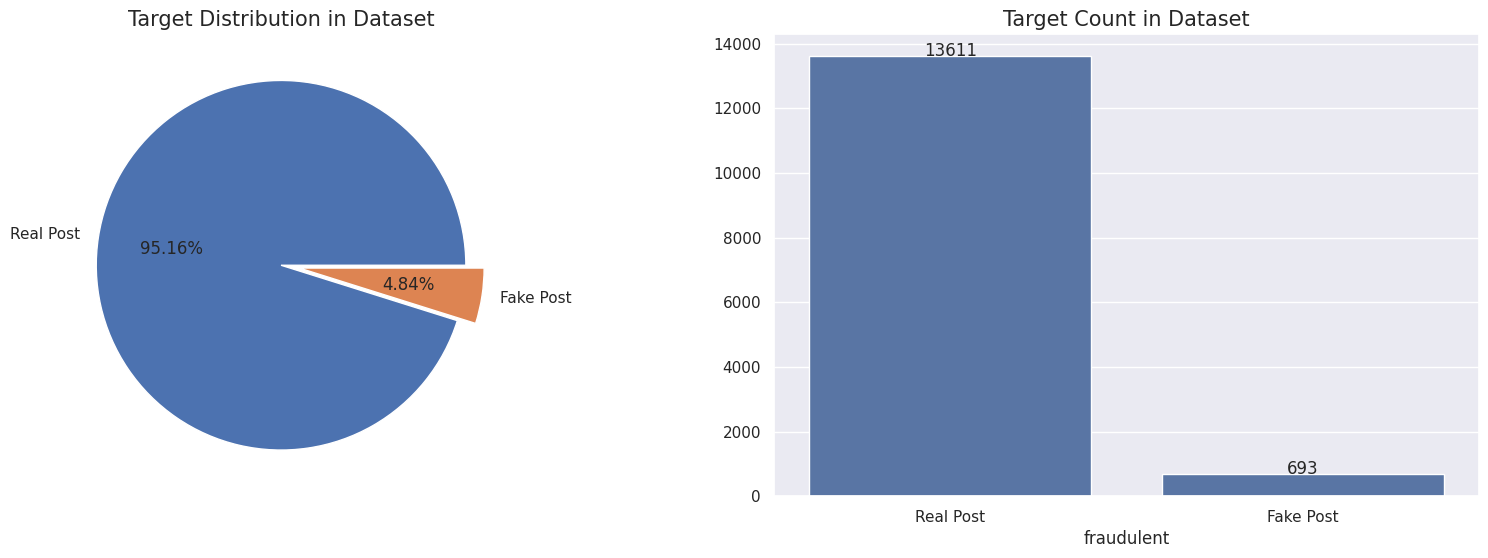

In [6]:
print(dataset.fraudulent.value_counts())
f, ax=plt.subplots(1,2, figsize=(20,6))

ax[0] = dataset['fraudulent'].value_counts().plot.pie(explode=[0, 0.1],autopct='%1.2f%%',ax=ax[0], labels=['Real Post', 'Fake Post'])

dataset2 = dataset["fraudulent"].value_counts()
ax[1] = sns.barplot(x = dataset2.index, y = dataset2, ax=ax[1])
ax[1].set_xticklabels(["Real Post", "Fake Post"])

ax[0].set_ylabel(' ')
ax[1].set_ylabel(' ')

ax[0].set_title('Target Distribution in Dataset', fontsize=15)
ax[1].set_title('Target Count in Dataset', fontsize=15)

for i, p in enumerate(ax[1].patches):
    height = p.get_height()
    ax[1].text(p.get_x()+p.get_width()/2., height + 0.9, dataset2[i],ha="center")

plt.show()

In [7]:
# stripping the whitespace in the data columns
clean_data = dataset
print(clean_data['title'].nunique())
clean_data['title'] = clean_data['title'].str.strip()
clean_data['title'].nunique()

9288


9046

In [8]:
print(clean_data.shape)
clean_data = clean_data.drop_duplicates()
print(clean_data.shape)

(14304, 18)
(14304, 18)


In [9]:
# Creating new columns to contain minimun and maximum salary
clean_data['min_salary'] = 0
clean_data['max_salary'] = 0
clean_data['salary_range'] = clean_data['salary_range'].str.split('-')

In [10]:
# Creating the range of salary from the minimun and maximum and exact range of the salary
for i in range(len(clean_data)):
    try:
        value = clean_data['salary_range'].iloc[i]
        if type(value) is list:
            clean_data['min_salary'].iloc[i] = int(value[0])
            clean_data['max_salary'].iloc[i] = int(value[1])
            clean_data['salary_range'].iloc[i] = int(value[1]) - int(value[0])
        else:
            clean_data['salary_range'].iloc[i] = 0

    except ValueError:
        clean_data['salary_range'].iloc[i] = 0
    except IndexError:
        clean_data['salary_range'].iloc[i] = 0
clean_data['salary_range'] = clean_data['salary_range'].astype(str).astype(int)
clean_data

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,min_salary,max_salary
0,7531,Contact Center Representatives,"US, VA, Virginia Beach",NaN,0,Tidewater Finance Co. was established in 1992 ...,"Tidewater Finance Company, located in Virginia...",The position requires the following qualificat...,Our company offers a competitive salary plus B...,0,1,0,Full-time,Entry level,Unspecified,Financial Services,Customer Service,0,0,0
1,130,Customer Service Associate,"US, TX, Dallas",NaN,0,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,QualificationsMinimum of 1 year customer servi...,NaN,0,1,0,Full-time,Entry level,High School or equivalent,Telecommunications,Customer Service,0,0,0
2,4641,Automated Test Analyst,"NZ, , Auckland",Permanent,0,SilverStripe CMS &amp; Framework is an open so...,We are looking for a dedicated and passionate ...,NaN,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Information Technology and Services,NaN,0,0,0
3,403,Inside Sales Professional-Omaha,"US, NE, Omaha",NaN,0,"ABC Supply Co., Inc. is the nation’s largest w...","As a Sales Representative, you will provide as...","As a Sales Representative, you must have the a...",Your benefits package as a Sales Representativ...,0,1,0,Full-time,NaN,NaN,Building Materials,Sales,0,0,0
4,13219,Content Marketing/SEO Manager,"US, CA, Los Angeles",Marketing,0,MeUndies is a lifestyle brand that is transfor...,MeUndies is a lifestyle brand that is transfor...,REQUIREMENTS/QUALIFICATIONS/PERSONAL ATTRIBUTE...,"WHY MEUNDIES?We're a fast-growing, VC-backed c...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Marketing,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14299,1842,Public Relations Manager,"US, CA, Irvine",PR,20000,HappyFox is a young startup that is all about ...,HappyFox is a young web SaaS startup that is a...,5+ years of experience relevant PR Proven trac...,Competitive payCasual and creative work enviro...,0,1,1,Contract,Associate,Bachelor's Degree,Information Technology and Services,Public Relations,0,60000,80000
14300,11853,iOS Developer,"GR, I, Athens",NaN,0,tizU is a free iphone app that allows you to s...,"tizU, the mobile app that allows you to send h...",2+ years of iOS developmentHave published at l...,We are not funded and we can't offer a salary ...,0,1,1,NaN,NaN,NaN,NaN,NaN,0,0,0
14301,10871,Database Researcher,"US, NJ, Elmwood Park",NaN,0,"With over 1,300 investment professionals locat...",A Top Real Estate Investment Broker is seeking...,Required Skills:1. Excel / Microsoft Office2. ...,NaN,0,1,0,Full-time,Entry level,High School or equivalent,Real Estate,NaN,0,20000,20000
14302,566,Customer Service Associate,"US, AZ, Phoenix",NaN,0,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Full-time,Entry level,High School or equivalent,Legal Services,Administrative,0,0,0


In [11]:
text_data = clean_data

# checking for missing values
text_data.isnull().sum()

,0
job_id,0
title,0
location,280
department,9275
salary_range,0
company_profile,2672
description,1
requirements,2132
benefits,5803
telecommuting,0


In [12]:
# Replacing missing values with an empty string for text columns
text_data['location'] = text_data['location'].fillna("")
text_data['department'] = text_data['department'].fillna("")
text_data['company_profile'] = text_data['company_profile'].fillna("")
text_data['description'] = text_data['description'].fillna("")
text_data['requirements'] = text_data['requirements'].fillna("")
text_data['benefits'] = text_data['benefits'].fillna("")
text_data['employment_type'] = text_data['employment_type'].fillna("")
text_data['required_experience'] = text_data['required_experience'].fillna("")
text_data['required_education'] = text_data['required_education'].fillna("")
text_data['industry'] = text_data['industry'].fillna("")
text_data['function'] = text_data['function'].fillna("")

# Concatenating all columns with textual information
text_data['text'] = (
    text_data['title'] + ' ' +
    text_data['location'] + ' ' +
    text_data['department'] + ' ' +
    text_data['company_profile'] + ' ' +
    text_data['description'] + ' ' +
    text_data['requirements'] + ' ' +
    text_data['benefits'] + ' ' +
    text_data['employment_type'] + ' ' +
    text_data['required_experience'] + ' ' +
    text_data['required_education'] + ' ' +
    text_data['industry'] + ' ' +
    text_data['function']
)

# Dropping columns with individual textual data (optional, for clean training)
text_data = text_data.drop([
    'title', 'location', 'department', 'company_profile',
    'description', 'requirements', 'benefits',
    'employment_type', 'required_experience', 'required_education',
    'industry', 'function'
], axis=1)

# Final dataset preview
text_data.head()


,job_id,salary_range,telecommuting,has_company_logo,has_questions,fraudulent,min_salary,max_salary,text
0,7531,0,0,1,0,0,0,0,"Contact Center Representatives US, VA, Virgini..."
1,130,0,0,1,0,0,0,0,"Customer Service Associate US, TX, Dallas Nov..."
2,4641,0,0,1,1,0,0,0,"Automated Test Analyst NZ, , Auckland Permane..."
3,403,0,0,1,0,0,0,0,"Inside Sales Professional-Omaha US, NE, Omaha ..."
4,13219,0,0,1,0,0,0,0,"Content Marketing/SEO Manager US, CA, Los Ange..."


In [13]:
# Processing text with python methods and regex to remove stopward, numbers, puntuations and non english characters
text_data['text'] = text_data['text'].str.lower()
stop = stopwords.words('english')
text_data['text'] = text_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
text_data['text'] = text_data['text'].str.replace(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '')
text_data['text'] = text_data['text'].str.replace(r'[\'-]', '')
text_data['text'] = text_data['text'].str.replace(r'[\'\",()*&^%$#@!~`+=|/<>?{}\[\]\/\\:;\_]]', ' ')
text_data['text'] = text_data['text'].apply(lambda x: ' '.join([word for word in x.split() if not word.startswith('url')]))
text_data['text'] = text_data['text'].apply(lambda x: ' '.join([word for word in x.split(' ') if len(word)<25]))
text_data['text'] = text_data['text'].map(lambda x: re.sub(r'\W+', ' ', x))
text_data['text'] = text_data['text'].str.replace(r'[0-9]', '')
text_data['text'] = text_data['text'].str.replace(r'[^a-z]', ' ')
text_data.head(3)

,job_id,salary_range,telecommuting,has_company_logo,has_questions,fraudulent,min_salary,max_salary,text
0,7531,0,0,1,0,0,0,0,contact center representatives us va virginia ...
1,130,0,0,1,0,0,0,0,customer service associate us tx dallas novite...
2,4641,0,0,1,1,0,0,0,automated test analyst nz auckland permanent s...


In [15]:
# Further text processing with lemmatizing
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in word_tokenize(text)]

text_data['text'] = text_data['text'].apply(lemmatize_text)
text_data['text'] = [' '.join(map(str, l)) for l in text_data['text']]
text_data.head(3)

,job_id,salary_range,telecommuting,has_company_logo,has_questions,fraudulent,min_salary,max_salary,text
0,7531,0,0,1,0,0,0,0,contact center representative u va virginia be...
1,130,0,0,1,0,0,0,0,customer service associate u tx dallas novitex...
2,4641,0,0,1,1,0,0,0,automated test analyst nz auckland permanent s...


In [16]:
# Calculating tharacter count for each text column
text_data['character_count'] = text_data.text.apply(len)
text_data[['text', 'character_count']]

,text,character_count
0,contact center representative u va virginia be...,3089
1,customer service associate u tx dallas novitex...,3443
2,automated test analyst nz auckland permanent s...,2507
3,inside sale professional omaha u ne omaha abc ...,2460
4,content marketing seo manager u ca los angeles...,3256
...,...,...
14299,public relation manager u ca irvine pr happyfo...,1857
14300,io developer gr i athens tizu free iphone app ...,1814
14301,database researcher u nj elmwood park 1 300 in...,1352
14302,customer service associate u az phoenix novite...,2399


In [17]:
text_data.describe()

,job_id,salary_range,telecommuting,has_company_logo,has_questions,fraudulent,min_salary,max_salary,character_count
count,14304.000000,1.430400e+04,14304.000000,14304.000000,14304.000000,14304.000000,1.430400e+04,1.430400e+04,14304.000000
mean,8929.775098,3.699832e+04,0.041597,0.792995,0.492939,0.048448,6.533213e+04,1.023304e+05,2052.874441
std,5175.090260,3.352591e+06,0.199673,0.405173,0.499968,0.214718,6.689518e+06,1.003692e+07,1106.099504
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,22.000000
25%,4438.750000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1226.000000
50%,8905.500000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1959.500000
75%,13430.250000,0.000000e+00,0.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,2690.000000
max,17880.000000,4.000000e+08,1.000000,1.000000,1.000000,1.000000,8.000000e+08,1.200000e+09,11905.000000


In [18]:
model_data = text_data[['fraudulent', 'text', 'character_count', 'telecommuting', 'has_company_logo']].reset_index(drop=True)
model_data

,fraudulent,text,character_count,telecommuting,has_company_logo
0,0,contact center representative u va virginia be...,3089,0,1
1,0,customer service associate u tx dallas novitex...,3443,0,1
2,0,automated test analyst nz auckland permanent s...,2507,0,1
3,0,inside sale professional omaha u ne omaha abc ...,2460,0,1
4,0,content marketing seo manager u ca los angeles...,3256,0,1
...,...,...,...,...,...
14299,0,public relation manager u ca irvine pr happyfo...,1857,0,1
14300,0,io developer gr i athens tizu free iphone app ...,1814,0,1
14301,0,database researcher u nj elmwood park 1 300 in...,1352,0,1
14302,0,customer service associate u az phoenix novite...,2399,0,1


In [19]:
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))

In [20]:
vectorizer.fit(model_data['text'])

TfidfVectorizer(max_features=10000, ngram_range=(1, 2))

In [21]:
X = vectorizer.fit_transform(model_data['text']).toarray()   # independent
y = model_data['fraudulent']   # dependent

In [22]:
X = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)
X_train

,00,00 00,00 per,00 pm,000,000 people,000 per,00am,0in,10,...,σε,στην,στο,τα,την,της,τις,το,του,των
11781,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4621,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9557,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7776,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3477,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.022988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6144,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6805,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.070265,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4444,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.026279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
adasyn=ADASYN()
X_res, y_res = adasyn.fit_resample(X_train, y_train)

In [24]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
selector = SelectFromModel(estimator=LinearSVC()).fit(X_res, y_res)

#Transform train and test data
X_select = selector.transform(X_res)
X_select_test = selector.transform(X_test)

# Selecting the base model with accuracy

rf=RandomForestClassifier().fit(X_select,y_res)
print(f"Random Forest train accuracy: {accuracy_score(rf.predict(X_select),y_res)}")
print(f"Random Forest test accuracy: {accuracy_score(rf.predict(X_select_test),y_test)}")


svc = LinearSVC().fit(X_select, y_res)
print(f"SVC train accuracy: {accuracy_score(svc.predict(X_select),y_res)}")
print(f"SVC test accuracy: {accuracy_score(svc.predict(X_select_test),y_test)}")


xgb=XGBClassifier().fit(X_select, y_res)
print(f"XGBoost train accuracy: {accuracy_score(xgb.predict(X_select),y_res)}")
print(f"XGBoost test accuracy: {accuracy_score(xgb.predict(X_select_test),y_test)}")



Random Forest train accuracy: 1.0
Random Forest test accuracy: 0.9804287045666356
SVC train accuracy: 0.9998947922146239
SVC test accuracy: 0.9797297297297297
XGBoost train accuracy: 0.9998421883219358
XGBoost test accuracy: 0.9834575955265611


In [25]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

# ── Helper so we don’t repeat ourselves ──────────────────────────────────────
def evaluate(model, X_train, y_train, X_test, y_test, name="Model"):
    """Fit → report accuracy + classification report on train & test sets."""
    model.fit(X_train, y_train)

    # Train metrics
    y_pred_train = model.predict(X_train)
    print(f"{name} ── TRAIN")
    print(f"  • accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
    print(classification_report(y_train, y_pred_train))

    # Test metrics
    y_pred_test = model.predict(X_test)
    print(f"{name} ── TEST")
    print(f"  • accuracy: {accuracy_score(y_test, y_pred_test):.4f}")
    print(classification_report(y_test, y_pred_test))
    print("─"*70, "\n")

# ── Train & evaluate each model ─────────────────────────────────────────────
evaluate(RandomForestClassifier(), X_select, y_res, X_select_test, y_test, "Random Forest")
evaluate(LinearSVC(),               X_select, y_res, X_select_test, y_test, "Linear SVC")
evaluate(XGBClassifier(eval_metric="logloss"), X_select, y_res, X_select_test, y_test, "XGBoost")


Random Forest ── TRAIN
  • accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9527
           1       1.00      1.00      1.00      9483

    accuracy                           1.00     19010
   macro avg       1.00      1.00      1.00     19010
weighted avg       1.00      1.00      1.00     19010

Random Forest ── TEST
  • accuracy: 0.9800
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4084
           1       0.97      0.61      0.75       208

    accuracy                           0.98      4292
   macro avg       0.97      0.80      0.87      4292
weighted avg       0.98      0.98      0.98      4292

────────────────────────────────────────────────────────────────────── 

Linear SVC ── TRAIN
  • accuracy: 0.9999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9527
           1       1.00      1.00   

In [26]:

pac=PassiveAggressiveClassifier().fit(X_select, y_res)
print(f"Passive Aggressive Classifier train accuracy: {accuracy_score(pac.predict(X_select),y_res)}")
print(f"Passive Aggressive Classifier test accuracy: {accuracy_score(pac.predict(X_select_test),y_test)}")


Passive Aggressive Classifier train accuracy: 1.0
Passive Aggressive Classifier test accuracy: 0.9813606710158435


In [27]:
start_time = time.time()
pac = PassiveAggressiveClassifier()
loss = ['hinge', 'squared_hinge']
shuffle = [True, False]
param_dist = {"shuffle": shuffle, "loss": loss, "n_jobs": [-1]}
grid_search = GridSearchCV(pac, param_grid=param_dist, scoring='f1', cv=5)
grid_search.fit(X_select, y_res)
best_pac = grid_search.best_estimator_
print(best_pac)
y_predict_pac = best_pac.predict(X_select_test)
end_time = time.time()

PassiveAggressiveClassifier(n_jobs=-1)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4084
           1       0.87      0.72      0.79       208

    accuracy                           0.98      4292
   macro avg       0.93      0.86      0.89      4292
weighted avg       0.98      0.98      0.98      4292

Execution time: 0.8427451491355896 min


Text(46.25, 0.5, 'Truth')

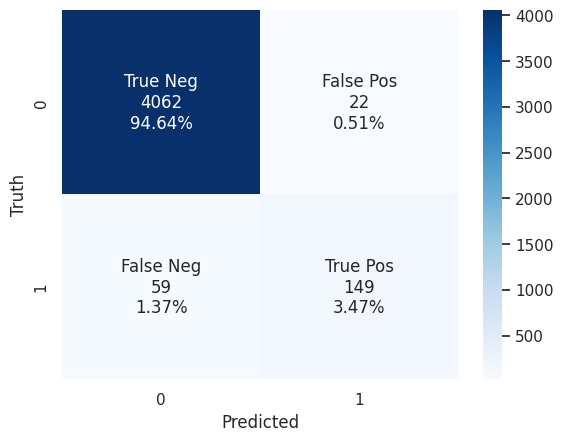

In [28]:
pac_report = classification_report(y_test, y_predict_pac)
print(pac_report)
print("Execution time: %s min" % ((end_time - start_time)/60))

# making a confusion matrix
cf_matrix = confusion_matrix(y_test, y_predict_pac)
group_names = ["True Neg","False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
start_time = time.time()
pac = PassiveAggressiveClassifier(n_jobs=-1)
pac.fit(X_res, y_res)
y_predict_pac = pac.predict(X_test)
end_time = time.time()

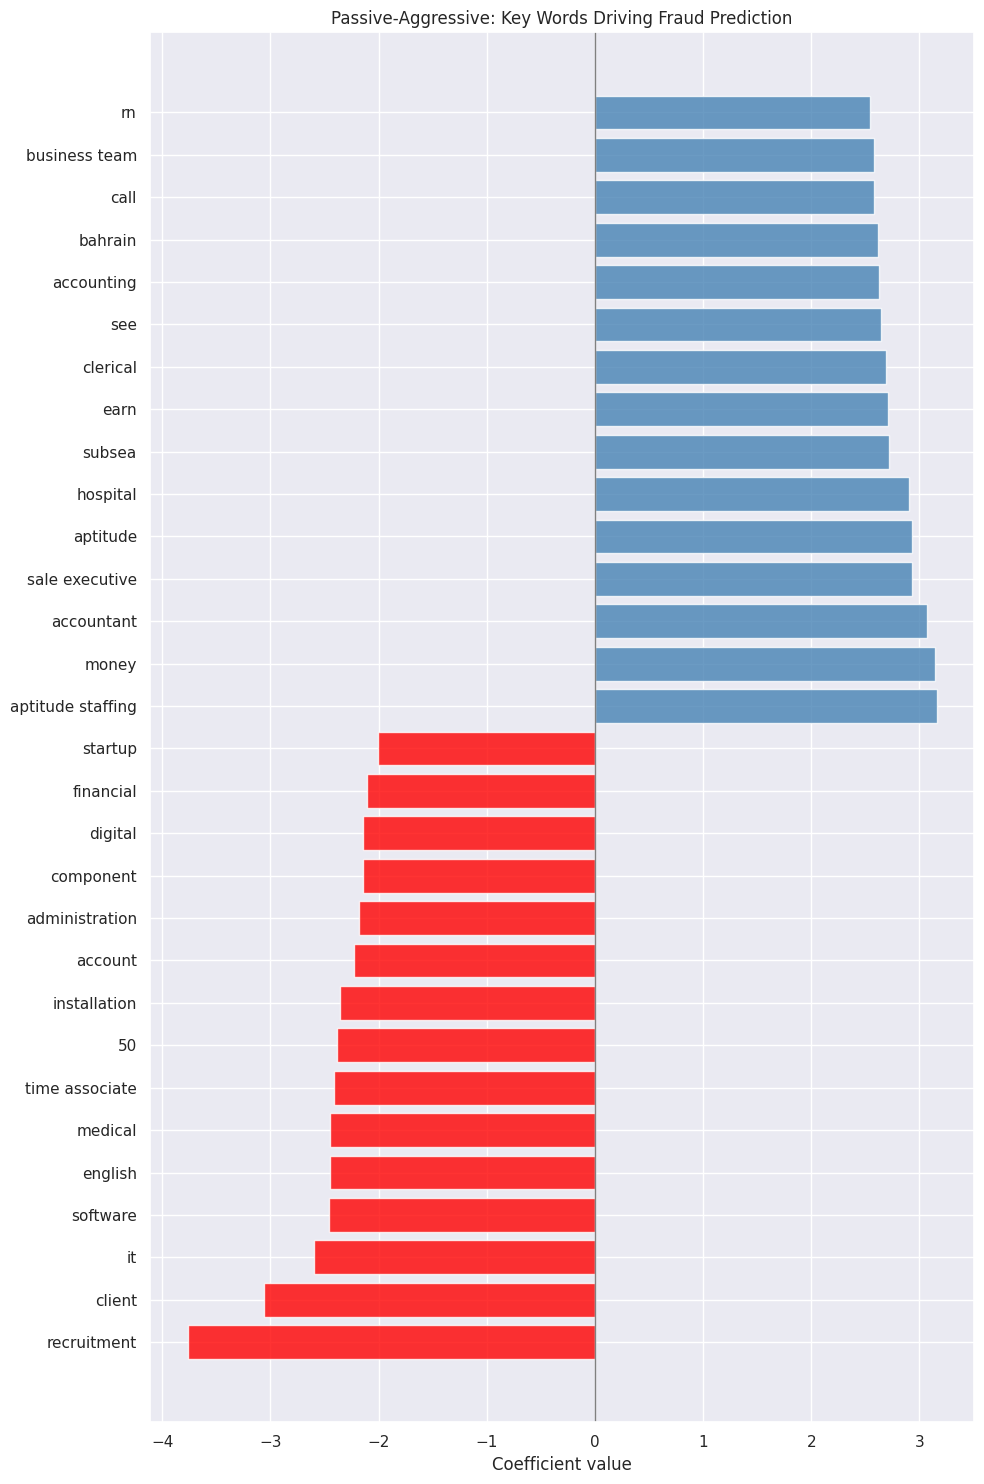

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_top_coefficients(clf, vectorizer, top_n=20, title="Top Model Features"):
    """
    Display the top_n most positive and negative coefficients of a linear model.

    Parameters
    ----------
    clf : fitted linear classifier (e.g. PassiveAggressiveClassifier, LogisticRegression, LinearSVC)
    vectorizer : the fitted text vectorizer
    top_n : int, number of features to display from each side (total will be 2*top_n)
    title : str, plot title
    """
    # 1️⃣  Collect coefficients → DataFrame
    feature_names = np.asarray(vectorizer.get_feature_names_out())
    coefs         = clf.coef_[0]              # shape (n_features,)
    coeff_df      = pd.DataFrame({
        "feature": feature_names,
        "coef":    coefs
    })

    # 2️⃣  Split into most‑negative & most‑positive
    top_negative = coeff_df.nsmallest(top_n, "coef")
    top_positive = coeff_df.nlargest(top_n,  "coef")
    top_features = pd.concat([top_negative, top_positive])
    top_features.reset_index(drop=True, inplace=True)

    # 3️⃣  Plot
    plt.figure(figsize=(10, 0.5 * len(top_features)))
    colors = ["red" if c < 0 else "steelblue" for c in top_features["coef"]]
    plt.barh(
        y=top_features.index,
        width=top_features["coef"],
        color=colors,
        alpha=0.8
    )
    plt.yticks(top_features.index, top_features["feature"])
    plt.axvline(0, color="grey", lw=1)
    plt.title(title)
    plt.xlabel("Coefficient value")
    plt.tight_layout()
    plt.show()

    # 4️⃣  Return the underlying DataFrame if you need it later
    return top_features

# ────────────────────────────────────────────────────────────────────────
# Example usage (with your pac model & vectorizer):
top_feats = plot_top_coefficients(pac, vectorizer, top_n=15,
                                  title="Passive‑Aggressive: Key Words Driving Fraud Prediction")


In [31]:
!jupyter nbconvert --to script your_notebook.ipynb


[NbConvertApp] WARNING | pattern 'your_notebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
 